## 7.1 词向量 Word2Vec

从本小节开始，我们正式进入自然语言处理器（NLP）的学习，强烈推荐斯坦福的[CS224n](https://web.stanford.edu/class/cs224n/)课程。

在自然语言处理系统当中，**词向量**是用于表示单词意义的向量， 并且还可以被认为是单词的特征向量或表示。 将单词映射到实向量的技术称为词嵌入。 近年来，词嵌入逐渐成为自然语言处理的基础知识。

### 7.1.1 词向量模型

独热向量是最为容易构建的，但是它并不是一个好的选择。一个主要原因是独热向量**不能准确表达不同词之间的相似度**，比如我们经常使用的“余弦相似度”。对于向量，它们的余弦相似度是它们之间角度的余弦：
$$
\frac{\mathbf{x}^{\top} \mathbf{y}}{\|\mathbf{x}\|\|\mathbf{y}\|} \in[-1,1]
$$
由于任意两个不同词的**独热向量之间的余弦相似度为0**，所以独热向量不能编码词之间的相似性。

word2vec工具是为了解决上述问题而提出的。它将每个词映射到一个**固定长度的向量**，这些向量能更好地表达不同词之间的相似性和类比关系。
word2vec工具包含两个模型，即**跳元模型**（skip-gram）和**连续词袋**（CBOW） 。对于在语义上有意义的表示，它们的训练依赖于条件概率，条件概率可以被看作是使用语料库中一些词来预测另一些单词。由于是不带标签的数据，因此跳元模型和连续词袋都是自监督模型。

* **跳元模型(Skip-Gram)**

跳元模型假设一个词可以用来在文本序列中生成其周围的单词。以文本序列“the”、“man”、“loves”、“his”、“son”为例。假设中心词选择“loves”，并将上下文窗口设置为2
给定中心词“loves”，跳元模型考虑生成上下文词“the”、“man”、“him”、“son”的条件概率：
$$
P(“the”、“man”、“him”、“son” | "loves")
$$
假设上下文词是在给定中心词的情况下独立生成的（即条件独立性）。在这种情况下，上述条件概率可以重写为：
$$
P(\text { "the" |"loves" }) \cdot P(" \text { man" | "loves" }) \cdot P(\text { "his" | "loves" }) \cdot P(\text { "son" | "loves" }) .
$$
![](https://zh.d2l.ai/_images/skip-gram.svg)


![image-20220609195244586](https://s2.loli.net/2022/06/09/x8m29HSwMNOfjIy.png)

目标函数为：
$$
J(\theta)=-\frac{1}{T} \log L(\theta)=-\frac{1}{T} \sum_{t=1}^{T} \sum_{\substack{-m \leq j \leq m \\ j \neq 0}} \log P\left(w_{t+j} \mid w_{t} ; \theta\right)
$$

* **如何计算** $P(w_{t+j} \mid w_{t};\theta)$?

  * 每个单词 $w$ 使用两个向量来计算

    * $v_w$ when $w$ is a ==center word==
    * $u_w$ when $w$ is a ==context word==

  * center word $c$ 和 context word $o$:

    * $$
      P(o \mid c)=\frac{\exp \left(u_{o}^{T} v_{c}\right)}{\sum_{w \in V} \exp \left(u_{w}^{T} v_{c}\right)}
      $$



  ![image-20220609195936885](https://s2.loli.net/2022/06/09/4V92XnBD5uNScfp.png)

**预测函数**

![image-20220609200429388](https://s2.loli.net/2022/06/09/IyS8Zct7h6qKRp5.png)

![image-20220609201213536](https://s2.loli.net/2022/06/09/sY1gt9kKyZzuQP4.png)

梯度
$$
\begin{aligned}
&\mathcal{U}_{\text {new }} \leftarrow \mathcal{U}_{\text {old }}-\alpha \nabla_{\mathcal{U}} J \\
&\mathcal{V}_{\text {old }} \leftarrow \mathcal{V}_{\text {old }}-\alpha \nabla_{\mathcal{V}} J
\end{aligned}
$$


简单实践：

[Genism Package for word2vec](https://radimrehurek.com/gensim/models/word2vec.html)

* 但这个包实际上在深度学习中**不常用**

[Gensim word vector visualization notebook](https://www.kaggle.com/code/yixuanzhou94/gensim-word-vector-visualization/notebook)

* **连续词袋（CBOW）模型**

*连续词袋*（CBOW）模型类似于跳元模型。与跳元模型的主要区别在于，连续词袋模型假设中心词是基于其在文本序列中的周围上下文词生成的。例如，在文本序列“the”、“man”、“loves”、“his”、“son”中，在“loves”为中心词且上下文窗口为2的情况下，连续词袋模型考虑基于上下文词“the”、“man”、“him”、“son”生成中心词“loves”的条件概率，即：

$$P(\textrm{"loves"}\mid\textrm{"the"},\textrm{"man"},\textrm{"his"},\textrm{"son"}).$$

![连续词袋模型考虑了给定周围上下文词生成中心词条件概率](http://d2l.ai/_images/cbow.svg)

由于连续词袋模型中存在多个上下文词，因此在计算条件概率时对这些上下文词向量进行平均。具体地说，对于字典中索引$i$的任意词，分别用$\mathbf{v}_i\in\mathbb{R}^d$和$\mathbf{u}_i\in\mathbb{R}^d$表示用作*上下文*词和*中心*词的两个向量（符号与跳元模型中相反）。给定上下文词$w_{o_1}, \ldots, w_{o_{2m}}$（在词表中索引是$o_1, \ldots, o_{2m}$）生成任意中心词$w_c$（在词表中索引是$c$）的条件概率可以由以下公式建模:

$$P(w_c \mid w_{o_1}, \ldots, w_{o_{2m}}) = \frac{\text{exp}\left(\frac{1}{2m}\mathbf{u}_c^\top (\mathbf{v}_{o_1} + \ldots, + \mathbf{v}_{o_{2m}}) \right)}{ \sum_{i \in \mathcal{V}} \text{exp}\left(\frac{1}{2m}\mathbf{u}_i^\top (\mathbf{v}_{o_1} + \ldots, + \mathbf{v}_{o_{2m}}) \right)}.$$


为了简洁起见，我们设为$\mathcal{W}_o= \{w_{o_1}, \ldots, w_{o_{2m}}\}$和$\bar{\mathbf{v}}_o = \left(\mathbf{v}_{o_1} + \ldots, + \mathbf{v}_{o_{2m}} \right)/(2m)$。那么可以简化为：

$$P(w_c \mid \mathcal{W}_o) = \frac{\exp\left(\mathbf{u}_c^\top \bar{\mathbf{v}}_o\right)}{\sum_{i \in \mathcal{V}} \exp\left(\mathbf{u}_i^\top \bar{\mathbf{v}}_o\right)}.$$

给定长度为$T$的文本序列，其中时间步$t$处的词表示为$w^{(t)}$。对于上下文窗口$m$，连续词袋模型的似然函数是在给定其上下文词的情况下生成所有中心词的概率：

$$ \prod_{t=1}^{T}  P(w^{(t)} \mid  w^{(t-m)}, \ldots, w^{(t-1)}, w^{(t+1)}, \ldots, w^{(t+m)}).$$


训练连续词袋模型与训练跳元模型几乎是一样的。连续词袋模型的最大似然估计等价于最小化以下损失函数：

$$  -\sum_{t=1}^T  \text{log}\, P(w^{(t)} \mid  w^{(t-m)}, \ldots, w^{(t-1)}, w^{(t+1)}, \ldots, w^{(t+m)}).$$

请注意，

$$\log\,P(w_c \mid \mathcal{W}_o) = \mathbf{u}_c^\top \bar{\mathbf{v}}_o - \log\,\left(\sum_{i \in \mathcal{V}} \exp\left(\mathbf{u}_i^\top \bar{\mathbf{v}}_o\right)\right).$$

通过微分，我们可以获得其关于任意上下文词向量$\mathbf{v}_{o_i}$（$i = 1, \ldots, 2m$）的梯度，如下：

$$\frac{\partial \log\, P(w_c \mid \mathcal{W}_o)}{\partial \mathbf{v}_{o_i}} = \frac{1}{2m} \left(\mathbf{u}_c - \sum_{j \in \mathcal{V}} \frac{\exp(\mathbf{u}_j^\top \bar{\mathbf{v}}_o)\mathbf{u}_j}{ \sum_{i \in \mathcal{V}} \text{exp}(\mathbf{u}_i^\top \bar{\mathbf{v}}_o)} \right) = \frac{1}{2m}\left(\mathbf{u}_c - \sum_{j \in \mathcal{V}} P(w_j \mid \mathcal{W}_o) \mathbf{u}_j \right).$$

其他词向量的梯度可以以相同的方式获得。与跳元模型不同，连续词袋模型通常使用上下文词向量作为词表示。

**小结:**
* 词向量是用于表示单词意义的向量，也可以看作是词的特征向量。将词映射到实向量的技术称为词嵌入。
* word2vec工具包含跳元模型和连续词袋模型。
* 跳元模型假设一个单词可用于在文本序列中，生成其周围的单词；而连续词袋模型假设基于上下文词来生成中心单词。

### 7.1.2 采样与近似训练

为了降低上述计算复杂度，本节将介绍两种近似训练方法：负采样和分层softmax。 由于跳元模型和连续词袋模型的相似性，我们将以跳元模型为例来描述这两种近似训练方法。

#### 7.1.2.1 负采样
> 此部分理论性较强，可以稍微了解一下，后面一小节我们将结合代码实践来学习负采样！

负采样修改了原目标函数。给定中心词$w_c$的上下文窗口，任意上下文词$w_o$来自该上下文窗口的被认为是由下式建模概率的事件：
$$P(D=1\mid w_c, w_o) = \sigma(\mathbf{u}_o^\top \mathbf{v}_c),$$

其中$\sigma$使用了sigmoid激活函数的定义：

$$\sigma(x) = \frac{1}{1+\exp(-x)}.$$

让我们从最大化文本序列中所有这些事件的联合概率开始训练词嵌入。具体而言，给定长度为$T$的文本序列，以$w^{(t)}$表示时间步$t$的词，并使上下文窗口为$m$，考虑最大化联合概率：

$$ \prod_{t=1}^{T} \prod_{-m \leq j \leq m,\ j \neq 0} P(D=1\mid w^{(t)}, w^{(t+j)}).$$

然而， 上面式子只考虑那些正样本的事件。仅当所有词向量都等于无穷大时，其中的联合概率才最大化为1。当然，这样的结果毫无意义。为了使目标函数更有意义，*负采样*添加从预定义分布中采样的负样本。

用$S$表示上下文词$w_o$来自中心词$w_c$的上下文窗口的事件。对于这个涉及$w_o$的事件，从预定义分布$P(w)$中采样$K$个不是来自这个上下文窗口*噪声词*。用$N_k$表示噪声词$w_k$（$k=1, \ldots, K$）不是来自$w_c$的上下文窗口的事件。假设正例和负例$S, N_1, \ldots, N_K$的这些事件是相互独立的。负采样将公式中的联合概率（仅涉及正例）重写为

$$ \prod_{t=1}^{T} \prod_{-m \leq j \leq m,\ j \neq 0} P(w^{(t+j)} \mid w^{(t)}),$$

通过事件$S, N_1, \ldots, N_K$近似条件概率：

$$ P(w^{(t+j)} \mid w^{(t)}) =P(D=1\mid w^{(t)}, w^{(t+j)})\prod_{k=1,\ w_k \sim P(w)}^K P(D=0\mid w^{(t)}, w_k).$$

分别用$i_t$和$h_k$表示词$w^{(t)}$和噪声词$w_k$在文本序列的时间步$t$处的索引。

关于条件概率的对数损失为：

$$
\begin{aligned}
-\log P(w^{(t+j)} \mid w^{(t)})
=& -\log P(D=1\mid w^{(t)}, w^{(t+j)}) - \sum_{k=1,\ w_k \sim P(w)}^K \log P(D=0\mid w^{(t)}, w_k)\\
=&-  \log\, \sigma\left(\mathbf{u}_{i_{t+j}}^\top \mathbf{v}_{i_t}\right) - \sum_{k=1,\ w_k \sim P(w)}^K \log\left(1-\sigma\left(\mathbf{u}_{h_k}^\top \mathbf{v}_{i_t}\right)\right)\\
=&-  \log\, \sigma\left(\mathbf{u}_{i_{t+j}}^\top \mathbf{v}_{i_t}\right) - \sum_{k=1,\ w_k \sim P(w)}^K \log\sigma\left(-\mathbf{u}_{h_k}^\top \mathbf{v}_{i_t}\right).
\end{aligned}
$$

我们可以看到，现在每个训练步的梯度计算成本与词表大小无关，而是线性依赖于$K$。当将超参数$K$设置为较小的值时，在负采样的每个训练步处的梯度的计算成本较小。

#### 7.1.2.2 层序`Softmax`

![](https://zh.d2l.ai/_images/hi-softmax.svg)

用于近似训练的分层softmax，其中书的每个叶子节点表示词表中的一个词。

*层序Softmax*（hierarchical softmax）使用二叉树, 其中树的每个叶节点表示词表$\mathcal{V}$中的一个词。
用$L(w)$表示二叉树中表示字$w$的从根节点到叶节点的路径上的节点数（包括两端）。设$n(w,j)$为该路径上的$j^\mathrm{th}$节点，其上下文字向量为$\mathbf{u}_{n(w, j)}$。
条件概率近似为

$$P(w_o \mid w_c) = \prod_{j=1}^{L(w_o)-1} \sigma\left( [\![  n(w_o, j+1) = \text{leftChild}(n(w_o, j)) ]\!] \cdot \mathbf{u}_{n(w_o, j)}^\top \mathbf{v}_c\right),$$

其中函数$\sigma$在式子中定义，$\text{leftChild}(n)$是节点$n$的左子节点：如果$x$为真，$[\![x]\!] = 1$;否则$[\![x]\!] = -1$。

为了说明，让我们计算中给定词$w_c$生成词$w_3$的条件概率。这需要$w_c$的词向量$\mathbf{v}_c$和从根到$w_3$的路径（图中加粗的路径）上的非叶节点向量之间的点积，该路径依次向左、向右和向左遍历：

$$P(w_3 \mid w_c) = \sigma(\mathbf{u}_{n(w_3, 1)}^\top \mathbf{v}_c) \cdot \sigma(-\mathbf{u}_{n(w_3, 2)}^\top \mathbf{v}_c) \cdot \sigma(\mathbf{u}_{n(w_3, 3)}^\top \mathbf{v}_c).$$

由$\sigma(x)+\sigma(-x) = 1$，它认为基于任意词$w_c$生成词表$\mathcal{V}$中所有词的条件概率总和为1：

$$\sum_{w \in \mathcal{V}} P(w \mid w_c) = 1.$$

幸运的是，由于二叉树结构，$L(w_o)-1$大约与$\mathcal{O}(\text{log}_2|\mathcal{V}|)$是一个数量级。当词表大小$\mathcal{V}$很大时，与没有近似训练的相比，使用分层softmax的每个训练步的计算代价显著降低。

**小结：**
* 负采样通过考虑相互独立的事件来构造损失函数，这些事件同时涉及正例和负例。训练的计算量与每一步的噪声词数成线性关系。
* 分层softmax使用二叉树中从根节点到叶节点的路径构造损失函数。训练的计算成本取决于词表大小的对数。

### 7.1.3 预训练词向量

#### 7.1.3.1 数据集
在本小节中，我们从用于预训练词嵌入模型的数据集开始：数据的原始格式将被转换为可以在训练期间迭代的小批量。


In [1]:
import math
import os
import random
import torch
from d2l import torch as d2l

* 读取数据集

我们在这里使用的数据集是Penn Tree Bank（PTB）。该语料库取自“华尔街日报”的文章，分为训练集、验证集和测试集。在原始格式中，文本文件的每一行表示由空格分隔的一句话。在这里，我们将每个单词视为一个词元。

In [2]:
#@save
d2l.DATA_HUB['ptb'] = (d2l.DATA_URL + 'ptb.zip',
                       '319d85e578af0cdc590547f26231e4e31cdf1e42')

def read_ptb():
    """将PTB数据集加载到文本行的列表中"""
    data_dir = d2l.download_extract('ptb')
    # Readthetrainingset.
    with open(os.path.join(data_dir, 'ptb.train.txt')) as f:
        raw_text = f.read()
    return [line.split() for line in raw_text.split('\n')]

sentences = read_ptb()
f'# sentences数: {len(sentences)}'

'# sentences数: 42069'

下边我们构建针对这个数据集的词汇表，其中出现次数少于10次的任何单词都将由\<unk\>词元替换。请注意，原始数据集还包含表示稀有（未知）单词的\<unk\>词元。

In [3]:
vocab = d2l.Vocab(sentences, min_freq=10)
f'vocab size: {len(vocab)}'

'vocab size: 6719'

* **下采样**

文本数据通常有“the”、“a”和“in”等高频词：它们在非常大的语料库中甚至可能出现数十亿次。然而，这些词经常在上下文窗口中与许多不同的词共同出现，提供的有用信息很少。
> 例如，考虑上下文窗口中的词“chip”：直观地说，它与低频单词“intel”的共现比与高频单词“a”的共现在训练中更有用。

此外，大量（高频）单词的训练速度很慢。

因此，当训练词嵌入模型时，可以对高频单词进行**下采样**。具体地说，数据集中的每个词$w_i$将**有概率地被丢弃**, 被丢弃的概率为：

$$P(w_i)=max(1-\sqrt{\frac{t}{f(w_i)}},0)$$

其中，$f(w_i)$是$w_i$的词数与数据集中的总词数的比率，常量$t$为超参数（实验中为$10^{-4}$）。我们可以看到，只有当相对比率$f\left(w_i\right)>t$时，（高频）词才能被丢弃，且该词的相对比率越高，被丢弃的概率就越大。

In [5]:
def subsample(sentences, vocab):
    """下采样高频词"""
    # 排除未知词元'<unk>'
    sentences = [[token for token in line if vocab[token] != vocab.unk]
                 for line in sentences]
    counter = d2l.count_corpus(sentences)
    num_tokens = sum(counter.values())

    # 如果在下采样期间保留词元，则返回True
    def keep(token):
        return(random.uniform(0, 1) <
               math.sqrt(1e-4 / counter[token] * num_tokens))

    return ([[token for token in line if keep(token)] for line in sentences],
            counter)

subsampled, counter = subsample(sentences, vocab)

下面的代码片段绘制了下采样前后每句话的词元数量的直方图。正如预期的那样，下采样通过删除高频词来显著缩短句子，这将使训练加速。

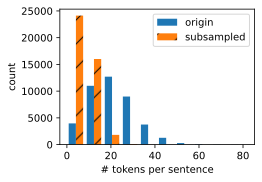

In [6]:
d2l.show_list_len_pair_hist(
    ['origin', 'subsampled'], '# tokens per sentence',
    'count', sentences, subsampled);

可以看到对于单个词元，高频词“the”的采样率不到1/20。 相比之下，低频词“join”则被完全保留。

In [8]:
def compare_counts(token):
    return (f'"{token}"的数量：'
            f'之前={sum([l.count(token) for l in sentences])}, '
            f'之后={sum([l.count(token) for l in subsampled])}')

compare_counts('the'), compare_counts('join')

('"the"的数量：之前=50770, 之后=1970', '"join"的数量：之前=45, 之后=45')

在下采样之后，我们将词元映射到它们在语料库中的索引。

In [9]:
corpus = [vocab[line] for line in subsampled]
corpus[:3]

[[], [392, 2115], [5277, 3054, 1580, 95]]

* 中心(`center`)词和上下文(`context`)词的提取

下面的`get_centers_and_contexts`函数从corpus中提取所有中心词及其上下文词。它随机采样1到max_window_size之间的整数作为上下文窗口。对于任一中心词，与其距离不超过采样上下文窗口大小的词为其上下文词。

In [10]:
def get_centers_and_contexts(corpus, max_window_size):
    """返回跳元模型中的中心词和上下文词"""
    centers, contexts = [], []
    for line in corpus:
        # 要形成“中心词-上下文词”对，每个句子至少需要有2个词
        if len(line) < 2:
            continue
        centers += line
        for i in range(len(line)):  # 上下文窗口中间i
            window_size = random.randint(1, max_window_size)
            indices = list(range(max(0, i - window_size),
                                 min(len(line), i + 1 + window_size)))
            # 从上下文词中排除中心词
            indices.remove(i)
            contexts.append([line[idx] for idx in indices])
    return centers, contexts

接下来，我们创建一个人工数据集，分别包含**7个和3个单词的两个句子**。设置最大**上下文窗口大小为2**，并打印所有中心词及其上下文词。

In [12]:
tiny_dataset = [list(range(7)), list(range(7, 10))]
print('数据集', tiny_dataset)
for center, context in zip(*get_centers_and_contexts(tiny_dataset, 2)):
    print('中心词', center, '的上下文词是', context)

数据集 [[0, 1, 2, 3, 4, 5, 6], [7, 8, 9]]
中心词 0 的上下文词是 [1, 2]
中心词 1 的上下文词是 [0, 2]
中心词 2 的上下文词是 [0, 1, 3, 4]
中心词 3 的上下文词是 [1, 2, 4, 5]
中心词 4 的上下文词是 [2, 3, 5, 6]
中心词 5 的上下文词是 [4, 6]
中心词 6 的上下文词是 [4, 5]
中心词 7 的上下文词是 [8, 9]
中心词 8 的上下文词是 [7, 9]
中心词 9 的上下文词是 [7, 8]


在PTB数据集上进行训练时，我们将最大上下文窗口大小设置为5。下面提取数据集中的所有中心词及其上下文词：

In [13]:
all_centers, all_contexts = get_centers_and_contexts(corpus, 5)
f'# “中心词-上下文词对”的数量: {sum([len(contexts) for contexts in all_contexts])}'

'# “中心词-上下文词对”的数量: 1499129'

* 负采样

在上一小节当中，我们已经通过晦涩的理论介绍过负采样了，在这里我们结合代码实践来深入了解负采样是如何进行近似训练的。

我们使用负采样进行近似训练。为了根据预定义的分布对噪声词进行采样，我们定义以下`RandomGenerator`类，其中（可能未规范化的）采样分布通过变量`sampling_weights`传递。

In [14]:
class RandomGenerator:
    """根据n个采样权重在{1,...,n}中随机抽取"""
    def __init__(self, sampling_weights):
        # Exclude
        self.population = list(range(1, len(sampling_weights) + 1))
        self.sampling_weights = sampling_weights
        self.candidates = []
        self.i = 0

    def draw(self):
        if self.i == len(self.candidates):
            # 缓存k个随机采样结果
            self.candidates = random.choices(
                self.population, self.sampling_weights, k=10000)
            self.i = 0
        self.i += 1
        return self.candidates[self.i - 1]

例如，我们可以在索引1、2和3中绘制10个随机变量$X$,采样概率为$P(X=1)=2 / 9, P(X=2)=3 / 9 \text { 和 } P(X=3)=4 / 9$，如下代码所示：

In [15]:
generator = RandomGenerator([2, 3, 4])
[generator.draw() for _ in range(10)]

[2, 3, 1, 3, 1, 3, 2, 1, 3, 3]

对于一对中心词和上下文词，我们随机抽取了K个（实验中为5个）噪声词。根据word2vec论文中的建议，将噪声词的采样概率设置为其在字典中的相对频率，其幂为0.75

In [16]:
def get_negatives(all_contexts, vocab, counter, K):
    """返回负采样中的噪声词"""
    # 索引为1、2、...（索引0是词表中排除的未知标记）
    sampling_weights = [counter[vocab.to_tokens(i)]**0.75
                        for i in range(1, len(vocab))]
    all_negatives, generator = [], RandomGenerator(sampling_weights)
    for contexts in all_contexts:
        negatives = []
        while len(negatives) < len(contexts) * K:
            neg = generator.draw()
            # 噪声词不能是上下文词
            if neg not in contexts:
                negatives.append(neg)
        all_negatives.append(negatives)
    return all_negatives

all_negatives = get_negatives(all_contexts, vocab, counter, 5)

* 小批量加载训练实例

In [19]:
def batchify(data):
    """返回带有负采样的跳元模型的小批量样本"""
    max_len = max(len(c) + len(n) for _, c, n in data)
    centers, contexts_negatives, masks, labels = [], [], [], []
    for center, context, negative in data:
        cur_len = len(context) + len(negative)
        centers += [center]
        contexts_negatives += [context + negative + [0] * (max_len - cur_len)]
        masks += [[1] * cur_len + [0] * (max_len - cur_len)]
        labels += [[1] * len(context) + [0] * (max_len - len(context))]
    return (torch.tensor(centers).reshape((-1, 1)), torch.tensor(contexts_negatives), torch.tensor(masks), torch.tensor(labels))

让我们使用一个小批量的两个样本来测试此函数。

In [20]:
x_1 = (1, [2, 2], [3, 3, 3, 3])
x_2 = (1, [2, 2, 2], [3, 3])
batch = batchify((x_1, x_2))

names = ['centers', 'contexts_negatives', 'masks', 'labels']
for name, data in zip(names, batch):
    print(name, '=', data)

centers = tensor([[1],
        [1]])
contexts_negatives = tensor([[2, 2, 3, 3, 3, 3],
        [2, 2, 2, 3, 3, 0]])
masks = tensor([[1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0]])
labels = tensor([[1, 1, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0]])


* 整合代码

最后我们定义了读取PTB数据集并返回数据迭代器和词表的`load_data_ptb`函数。

In [25]:
#@save
def load_data_ptb(batch_size, max_window_size, num_noise_words):
    """下载PTB数据集，然后将其加载到内存中"""
    num_workers = 0
    sentences = read_ptb()
    vocab = d2l.Vocab(sentences, min_freq=10)
    subsampled, counter = subsample(sentences, vocab)
    corpus = [vocab[line] for line in subsampled]
    all_centers, all_contexts = get_centers_and_contexts(
        corpus, max_window_size)
    all_negatives = get_negatives(
        all_contexts, vocab, counter, num_noise_words)

    class PTBDataset(torch.utils.data.Dataset):
        def __init__(self, centers, contexts, negatives):
            assert len(centers) == len(contexts) == len(negatives)
            self.centers = centers
            self.contexts = contexts
            self.negatives = negatives

        def __getitem__(self, index):
            return (self.centers[index], self.contexts[index],
                    self.negatives[index])

        def __len__(self):
            return len(self.centers)

    dataset = PTBDataset(all_centers, all_contexts, all_negatives)

    data_iter = torch.utils.data.DataLoader(
        dataset, batch_size, shuffle=True,
        collate_fn=batchify, num_workers=num_workers)
    return data_iter, vocab

让我们打印数据迭代器的第一个小批量。

In [26]:
data_iter, vocab = load_data_ptb(512, 5, 5)
for batch in data_iter:
    for name, data in zip(names, batch):
        print(name, 'shape:', data.shape)
    break

centers shape: torch.Size([512, 1])
contexts_negatives shape: torch.Size([512, 60])
masks shape: torch.Size([512, 60])
labels shape: torch.Size([512, 60])
